# Molecular descriptors

Začneme tím, že naimportujeme baličky a načteme soubor s daty. Tady použivame daty z cvičeni č. 2 - soubor <i>"CHEMBL26-chembl_26_activity.csv"</i>

In [4]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

with open('CHEMBL26-chembl_26_activity.csv', 'r') as file:
    inp = csv.DictReader(file, delimiter=';')
    data = [entity for entity in inp]

Dalé vytvořime univerzální funkci pro vytažení potřebných deskriptorů, ktera se bude jmenovát <b><i>extract_descriptors</i></b>:

In [14]:
def extract_descriptors(molecules_list):
    rings = []
    rotatable = []
    atomcount = []
    hba = []
    hbd = []
    molwt = []
    tpsa = []
    logp = [].
    for mol in molecules_list:
        rings.append(Chem.GetSSSR(mol))
        rotatable.append(Chem.CalcNumRotatableBonds(mol))
        atomcount.append(mol.GetNumHeavyAtoms())
        hba.append(rdescriptors.CalcNumLipinskiHBA(mol))
        hbd.append(rdescriptors.CalcNumLipinskiHBD(mol))
        molwt.append(rdescriptors.CalcExactMolWt(mol))
        tpsa.append(rdescriptors.CalcTPSA(mol))
        logp.append(Descriptors.MolLogP(mol))
    return [rings, rotatable, atomcount, hba, hbd, molwt, tpsa, logp]

Ted' opakujeme pipeline z cvika pro dataset Cytochromu, a podivame se na vysledky. Začneme tim, že uložime všichní molekuly do promenne <b><i>mol_list</i></b> a použijeme funkci <b><i>extract_descriptors</i></b> pro vytežovani descriptorů.

In [15]:
mol_list = [ Chem.MolFromSmiles(el['Smiles']) for el in data]
rings, rotatable, atomcount, hba, hbd, molwt, tpsa, logp = extract_descriptors(mol_list)

Udělame s těch deskriptorů dataframe, a nakreslime pomoci boxplotů. <b>tpsa</b> a <b>molwt</b> maji velke hodnoty, tomu udělame 2 boxplotů


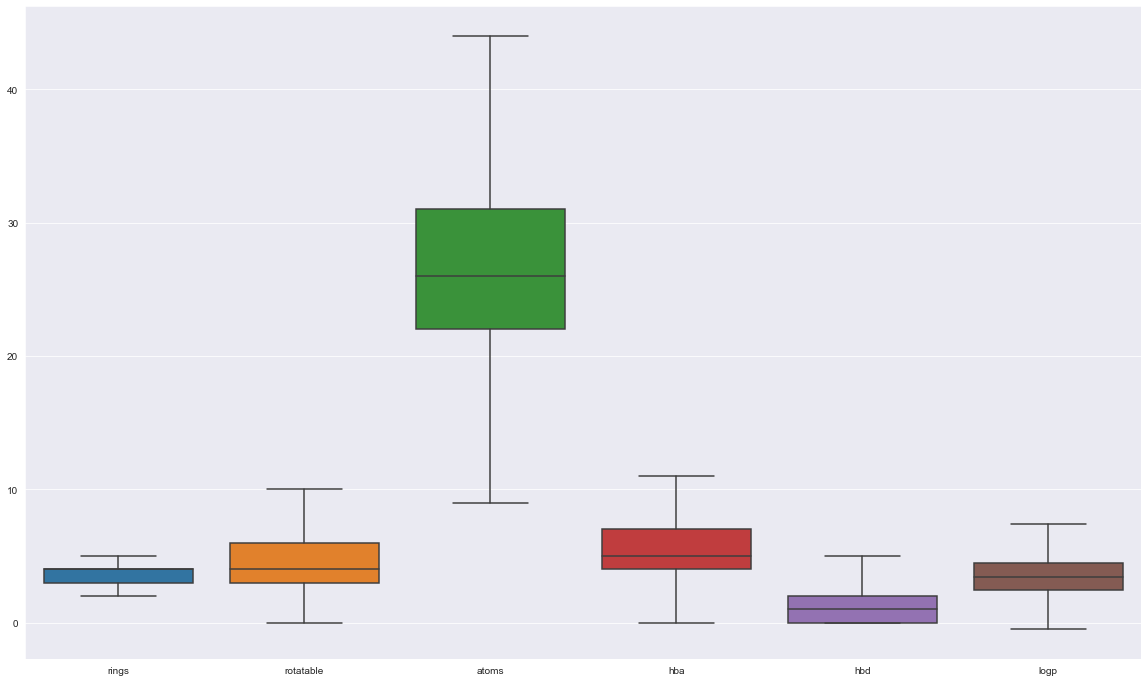

In [29]:
df = pd.DataFrame( data = { 'set' : 'cytochrome', 'rings' : rings, 'rotatable' : rotatable,
                            'atoms' : atomcount, 'hba' : hba, 'hbd' : hbd, 'molwt' : molwt,
                            'tpsa' : tpsa, 'logp' : logp})
plt.figure(figsize=(20,12))
sns.set_style('darkgrid')
sns.boxplot(data=df[['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp']], showfliers=False)

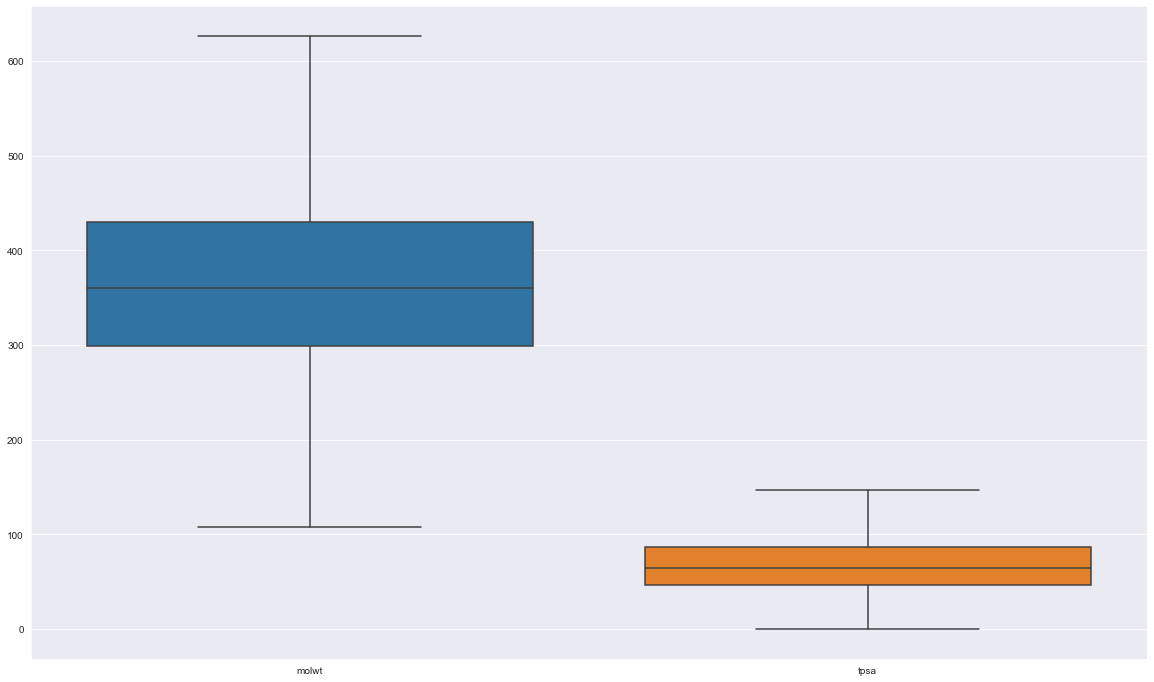

In [31]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df[['molwt', 'tpsa']], showfliers=False, )

Ted načteme soubor <b>drugbank.sdf</b> u udelame dataframe pro ho descriptory, a sjednocime obě tabulky.

In [35]:
sup = Chem.SDMolSupplier('drugbank.sdf')
drugs = [el for el in sup if not el == None]
drug_rings, drug_rotatable, drug_atomcount, drug_hba, drug_hbd, drug_molwt, drug_tpsa, drug_logp = extract_descriptors(drugs)
drug_df = pd.DataFrame( data = { 'set' : 'drugs', 'rings' : drug_rings, 'rotatable' : drug_rotatable,
                            'atoms' : drug_atomcount, 'hba' : drug_hba, 'hbd' : drug_hbd, 'molwt' : drug_molwt,
                            'tpsa' : drug_tpsa, 'logp' : drug_logp})

joint_df = pd.concat([df, drug_df], ignore_index=True)
melted_df1 = pd.melt(joint_df, id_vars=['set'], value_vars=['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp'])
melted_df2 = pd.melt(joint_df, id_vars=['set'], value_vars=['molwt', 'tpsa']) 

RDKit ERROR: [22:19:36] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [22:21:32] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [22:21:32] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [22:21:32] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [22:21:32] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [22:21:32] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [22:21:32] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [22:21:32] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [22:21:32] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [22:21:33] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [22:21:33] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [22:21:33] ERROR: Explicit v

RDKit ERROR: [22:21:33] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [22:21:33] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [22:21:33] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [22:21:33] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [22:21:33] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [22:21:33] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [22:21:33] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [22:21:33] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [22:21:33] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [22:21:33] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [22:21:33] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [22:21:33] ERROR: Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [22:21:33] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [22:21:33] ERROR: Could not sanitize molecule ending on line 659994
RDKit ERROR: [22:21:33] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [22:21:34] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [22:21:34] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [22:21:34] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [22:21:35] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [22:21:35] ERROR: Could not sanitize molecule ending on line 1151592


Ted' nakreslime boxploty

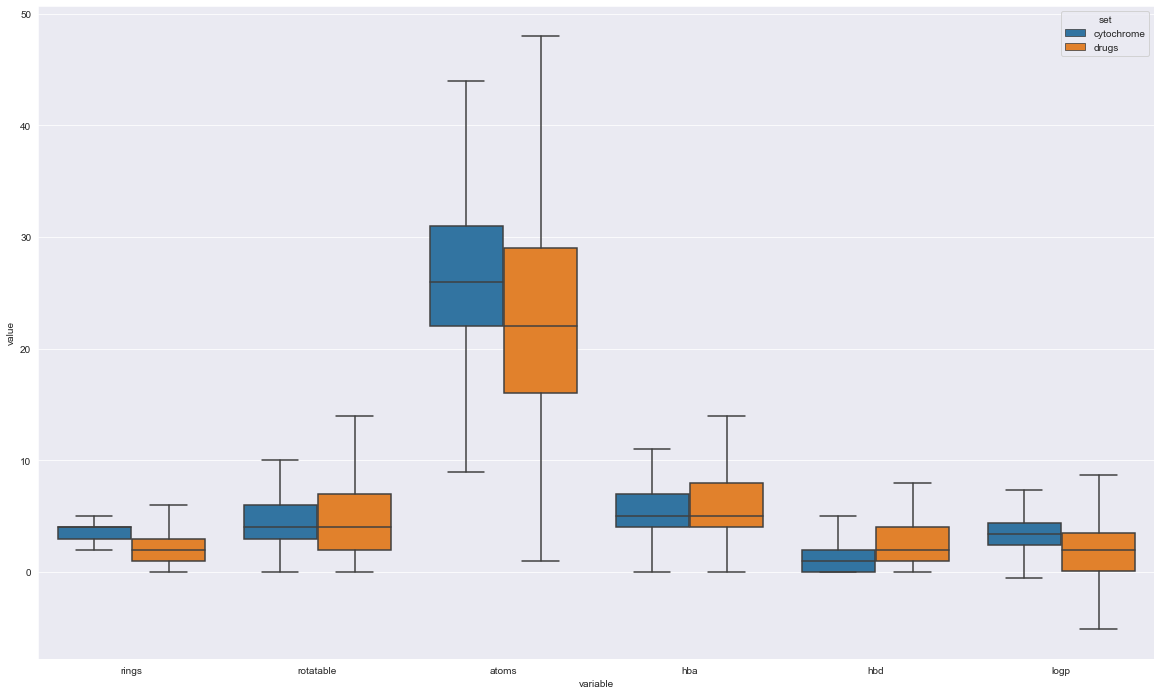

In [39]:
plt.figure(figsize=(20,12))
sns.boxplot(y = 'value', x = 'variable', hue = 'set', data=melted_df1, showfliers=False)

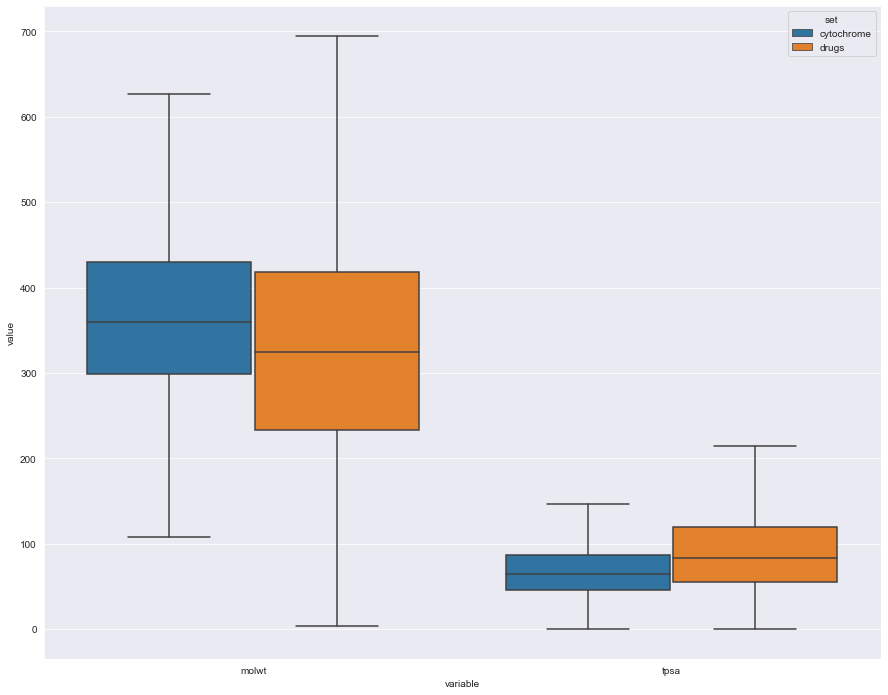

In [41]:
plt.figure(figsize=(15,12))
sns.boxplot(y = 'value', x = 'variable', hue = 'set', data=melted_df2, showfliers=False)

Na rozdil od <b>mTOR</b> datasetu z cvika, ligandy Cytochromu vypadai moc podobneši na latky z databazy Drugbank. Ale počet těžkých atomů se trochu liši. Jedine, co vychazi za 3. kvartil je počet kruhu. Vzhledem k tomu, že latky vypadaji podobnějši, než latky z <b>mTOR</b> datasetu, a nechci opakovat cvik uplně, tak musel něco vymyslet. Takže, našel jsem Lipninského pravidlo (https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five) a vyřešil oveřit, jak hodně látek v každem datasetu nejsou druglike (podobny na leky v českém?) podle těch pravidel. Pak, nakřeslil jsem vysledky pomoci barplotů.

Text(0.5, 1.0, "Number of drugs which didn't pass the Lipinski's rule")

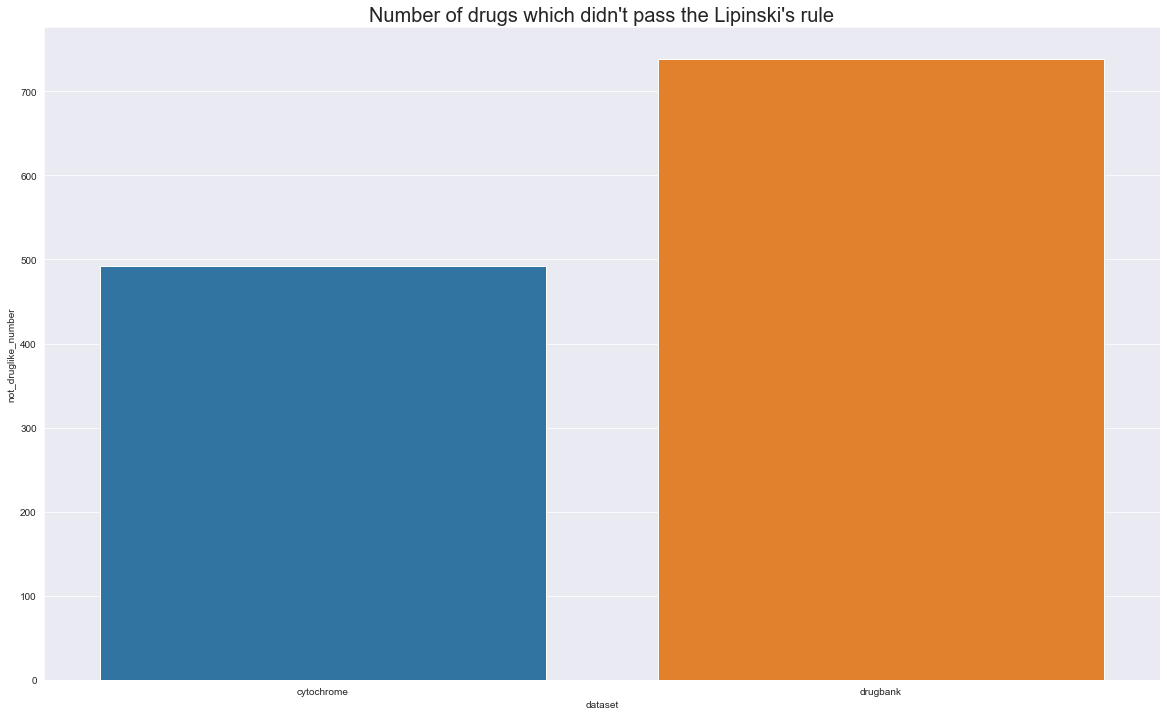

In [64]:
def lipinskyRuleCheck(element):
    count = 0
    if element['hbd'] > 5:
        count += 1
    if element['hba'] > 10:
        count += 1
    if element['molwt'] > 500:
        count += 1
    if element['logp'] > 5:
        count =+ 1
    if count > 1:
        return 1
    else:
        return 0

cyto = sum(df.apply(lambda x: lipinskyRuleCheck(x), axis=1))
drbk = sum(drug_df.apply(lambda x: lipinskyRuleCheck(x), axis=1))
not_druglike = pd.DataFrame( data={ 'dataset' : ['cytochrome', 'drugbank'],
                                   'not_druglike_number': [cyto, drbk],
                                   'ratio' : [cyto/len(mol_list)*100, drbk/len(drugs)*100]
                                 })
plt.figure(figsize=(20,12))
sns.barplot(x = 'dataset', y = 'not_druglike_number', data = not_druglike)
plt.title("Number of drugs which didn't pass the Lipinski's rule", fontsize=20)

Text(0.5, 1.0, "Ratio of drugs (%) which didn't pass the Lipinski's rule")

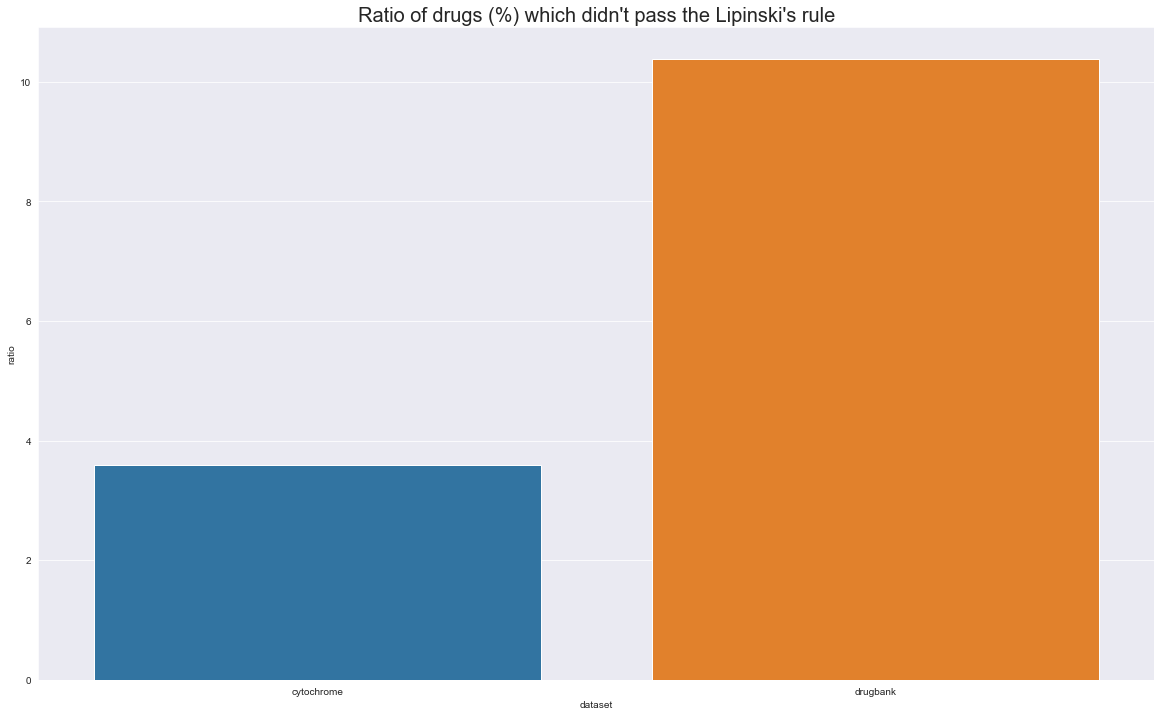

In [67]:
plt.figure(figsize=(20,12))
sns.barplot(x = 'dataset', y = 'ratio', data = not_druglike)
plt.title("Ratio of drugs (%) which didn't pass the Lipinski's rule", fontsize=20)

Takže, vidime, že dataset ligandů cztochromu obsahue přibliuně 500 (4%) latek, ktere nejsou druglike podle Lipninského pravidla, a přiblizně 750 (11%) latek z datasetu Drugbank. Ja bych řek, že pro dataset Drugbank, je toho vic, takže Lipninského pravidlo by totřebovalo 